In [7]:
from selenium import webdriver
driver= webdriver.Chrome(executable_path ='/Users/harshmis/Downloads/chromedriver_win32/chromedriver')
driver.maximize_window()
driver.get("https://www.kaggle.com/sudalairajkumar/covid19-in-india#covid_19_india.csv")
csv=driver.find_element_by_class_name("button__anchor-wrapper")
csv.click()
driver.implicitly_wait(10)
GoggleSign=driver.find_element_by_class_name("sc-jGxEUC")
GoggleSign.click()
Username=driver.find_element_by_class_name("whsOnd")
Username.send_keys("*******")
allow=driver.find_element_by_class_name("RveJvd")
allow.click()
Password=driver.find_element_by_name("password")
Password.send_keys("******")
enter=driver.find_element_by_id("passwordNext")
enter.click()
csv=driver.find_element_by_class_name("button__anchor-wrapper")
csv.click()


In [8]:
import time
from zipfile import ZipFile as zp
import os,sys,stat
time.sleep(15)
obj=zp("/Users/harshmis/Downloads/covid19-in-india.zip",'r')
obj.printdir()
os.chmod("/Users/harshmis/Downloads/covid19-in-india.zip",stat.S_IRWXU)
os.chmod("/Users/harshmis/Data science/covid_19_india.csv",stat.S_IRWXU)
print("Extracting csv file on the path = /Users/harshmis/Data science ")
obj.extract(member='covid_19_india.csv',path='/Users/harshmis/Data science')
print("ZIP Extract complete")
obj.close()
del(obj)
os.remove("/Users/harshmis/Downloads/covid19-in-india.zip")#delete zip file so that next time its downloaded fresh
print("NOTE:- Zip file removed! so that next time its downloaded fresh")

File Name                                             Modified             Size
AgeGroupDetails.csv                            2020-04-22 14:42:32          224
HospitalBedsIndia.csv                          2020-04-22 14:42:32         2266
ICMRTestingDetails.csv                         2020-04-22 14:42:32         1259
ICMRTestingLabs.csv                            2020-04-22 14:42:32        55732
IndividualDetails.csv                          2020-04-22 14:42:32      1260877
StatewiseTestingDetails.csv                    2020-04-22 14:42:32         7078
covid_19_india.csv                             2020-04-22 14:42:32        54205
population_india_census2011.csv                2020-04-22 14:42:32         3663
Extracting csv file on the path = /Users/harshmis/Data science 
ZIP Extract complete
NOTE:- Zip file removed! so that next time its downloaded fresh


In [9]:
import pandas as pd
india_covid=pd.read_csv("covid_19_india.csv")
individual_covid=pd.read_csv("IndividualDetails.csv")
print(india_covid.head(100))
print(len(india_covid))
india_covid['Confirmed'] = india_covid['Confirmed'].astype(int)

    Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0     1  30/01/20  6:00 PM               Kerala                       1   
1     2  31/01/20  6:00 PM               Kerala                       1   
2     3  01/02/20  6:00 PM               Kerala                       2   
3     4  02/02/20  6:00 PM               Kerala                       3   
4     5  03/02/20  6:00 PM               Kerala                       3   
..  ...       ...      ...                  ...                     ...   
95   96  10/03/20  6:00 PM            Telengana                       1   
96   97  10/03/20  6:00 PM    Jammu and Kashmir                       1   
97   98  11/03/20  6:00 PM          Maharashtra                       2   
98   99  11/03/20  6:00 PM                Delhi                       5   
99  100  11/03/20  6:00 PM              Haryana                       0   

   ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                         0      0       0 

In [11]:
df= pd.DataFrame([["Dummy", 0,0]], columns=["Date","Confirmed","Diff"])
for i in range(0,len(india_covid)):
    j=india_covid.Date[i]
    allvalues=india_covid.Confirmed[india_covid.Date==j]
    add=allvalues.sum()
    df.loc[i]=[j,add,add]
    if (i>0):
        df.loc[i]=[j,add,df.Diff[i]-df.Confirmed[i-1]]
clean_data=df.drop_duplicates(subset='Date',keep='first',inplace=False)
clean_data.tail()

,Date,Confirmed,Diff
1058,18/04/20,14792,957
1091,19/04/20,16116,1324
1124,20/04/20,17656,1540
1157,21/04/20,18985,1329
1190,22/04/20,20471,1486


In [39]:
import matplotlib.pyplot as plt
a=dict(zip(clean_data.Date,clean_data.Diff))
b=a.keys()
c=a.values()


{'30/01/20': 1, '31/01/20': 0, '01/02/20': 1, '02/02/20': 1, '03/02/20': 0, '04/02/20': 0, '05/02/20': 0, '06/02/20': 0, '07/02/20': 0, '08/02/20': 0, '09/02/20': 0, '10/02/20': 0, '11/02/20': 0, '12/02/20': 0, '13/02/20': 0, '14/02/20': 0, '15/02/20': 0, '16/02/20': 0, '17/02/20': 0, '18/02/20': 0, '19/02/20': 0, '20/02/20': 0, '21/02/20': 0, '22/02/20': 0, '23/02/20': 0, '24/02/20': 0, '25/02/20': 0, '26/02/20': 0, '27/02/20': 0, '28/02/20': 0, '29/02/20': 0, '01/03/20': 0, '02/03/20': 2, '03/03/20': 1, '04/03/20': 22, '05/03/20': 2, '06/03/20': 1, '07/03/20': 3, '08/03/20': 5, '09/03/20': 7, '10/03/20': 12, '11/03/20': 2, '12/03/20': 14, '13/03/20': 7, '14/03/20': 3, '15/03/20': 26, '16/03/20': 4, '17/03/20': 23, '18/03/20': 14, '19/03/20': 22, '20/03/20': 50, '21/03/20': 60, '22/03/20': 77, '23/03/20': 73, '24/03/20': 86, '25/03/20': 87, '26/03/20': 88, '27/03/20': 30, '28/03/20': 185, '29/03/20': 115, '30/03/20': 227, '31/03/20': 146, '01/04/20': 437, '02/04/20': 235, '03/04/20': 

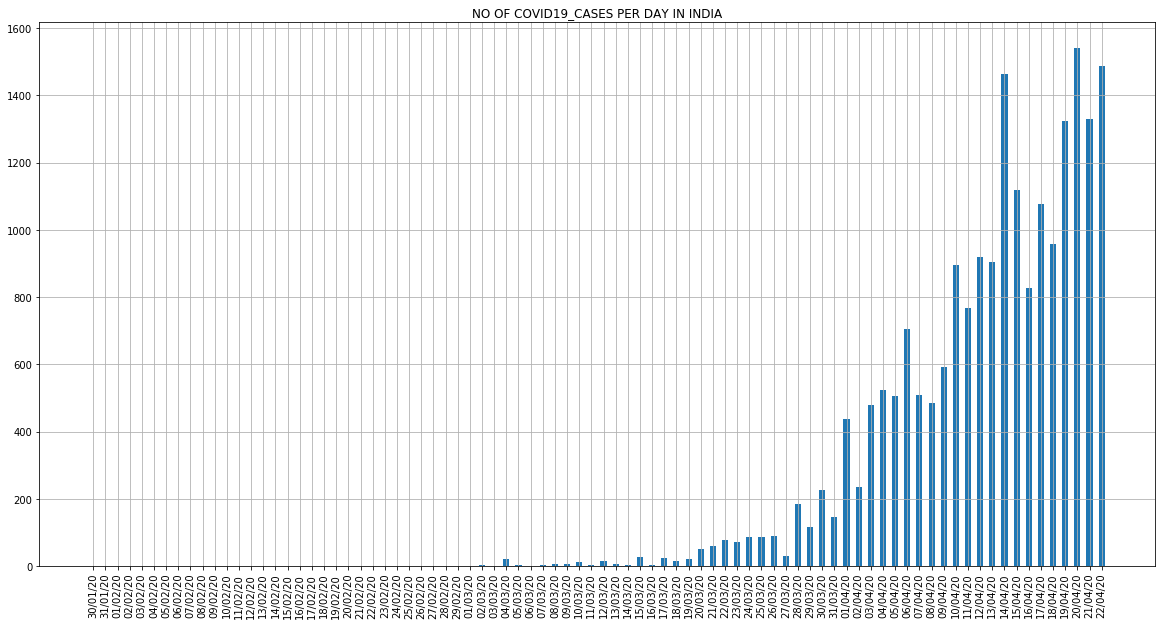

In [45]:
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)
plt.bar(b,c,width=0.5)
plt.xticks(rotation=90)
plt.title("NO OF COVID19_CASES PER DAY IN INDIA")
plt.grid()
plt.show()

In [40]:
print("Max no of cases observed on a single day" +" " + str(max(c)))

for key,value in a.items():
    if (max(c)==value):
        d=key
print("Max no of cases observed on date" +" " +str(d))
print("Total no of cases" + " " + str(clean_data.Diff.sum()))

Max no of cases observed on a single day 1540
Max no of cases observed on date 20/04/20
Total no of cases 20471
